## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


Import libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [2]:
df = pd.read_csv('assets/real_estate.csv', sep=';')
df.head()

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

#### What is the most expensive home in the dataset? (★☆☆)

Different ways of doing it:

In [31]:
df['price'].max()

8500000

In [30]:
df.price.max()

8500000

In [32]:
df.price.describe()

count    1.533500e+04
mean     4.773036e+05
std      5.912942e+05
min      0.000000e+00
25%      1.690000e+05
50%      2.800000e+05
75%      5.400000e+05
max      8.500000e+06
Name: price, dtype: float64

#### What is cheapest home in the dataset? (★☆☆)

In [26]:
df["price"].min()

0

#### What is the biggest and the smallest home in the dataset? (★☆☆)

In [35]:
df["surface"].max() #Biggest home   

249000.0

In [34]:
df["surface"].min() #Smaller home

15.0

Another way of doing it:

In [37]:
df = df[df['surface']>0]
data_filtered_2 = df.sort_values(by='surface', ascending=True)
data_filtered_2[0:1]
#Smaller home

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
498,499,152817874,False,toledo21,910757382.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,1.0,1.0,15.0,85000,...,0,0,0,0,0,0,"40,40818","-3,70192",NaN,NaN


In [38]:
df = df[df['surface']>0]
data_filtered_2 = df.sort_values(by='surface', ascending=False)
data_filtered_2[0:1]
#Biggest home

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
6794,6795,153936192,False,habitarium inmobiliaria,916357732.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,249000.0,289000,...,0,0,0,0,0,0,"40,34633","-4,02174",NaN,NaN


#### How many populations (level5) the dataset contains? (★☆☆)

In [6]:
level_5_unique = df['level5'].unique()
len(level_5_unique)

168

#### Does the dataset contain NAs? (★☆☆)


In [18]:
df.isna().sum()

Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      721
url_inmueble            0
rooms                 322
bathrooms             295
surface                 0
price                   0
date                    0
description           129
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6237
level5                  0
level6              13408
level7               2024
level8               7749
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             14085
customZone          14085
dtype: int64

#### Delete the NAs of the dataset, if applicable (★★☆)

In [29]:
#Acá no usamos dropna porque hay muchos missing y la función dropna borra las rows en las que hay missing, en este caso nos quedamos sin datos casi.
#Lo que sí se puede hacer es reemplazar los na por otros valores, por ejemplo:
# df['level6'].fillna("sin-determinar", inplace=True) #Reemplaza los NA en "level6" con "sin-determinar"
# df['rooms'].fillna(0, inplace=True) #Reemplaza los NA en "rooms" con 0


#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [5]:
df_arroyo = df[df['level5'] == "Arroyomolinos (Madrid)"] #Me quedo solo con los de Arroyomolinos
prices_arroyo_sin_0 = df_arroyo[df_arroyo['price'] > 0] #Me quedo solo con los precios de Arroyomolinos que son mayores a 0
prices_arroyo_sin_0['price'].mean() #Calculo la media de los precios de Arroyomolinos sin ceros


298905.1777777778

Shorter way of doing it:

In [6]:
data_price=df[df['price']>0] #Filtra los precios de todo el dataframe > 0
print(str(round(data_price[data_price.level5 == "Arroyomolinos (Madrid)"].price.mean(),2))) #Calcula la media para los precios de Arroyomolinos

298905.18


#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Text(0.5, 1.0, 'Histogram of prices for Arroyomolinos population')

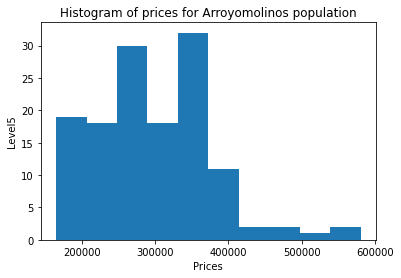

In [4]:
df_arroyo = df[df['level5'] == "Arroyomolinos (Madrid)"] #Me quedo solo con los de Arroyomolinos
prices_arroyo_sin_0 = df_arroyo[df_arroyo['price'] > 0] #Me quedo solo con los precios de Arroyomolinos sin 0
plt.hist(prices_arroyo_sin_0['price']) #Lo ploteo
plt.xlabel('Prices')
plt.ylabel('Level5')
plt.title('Histogram of prices for Arroyomolinos population')

#La mayoría de las casas de Arroyomolinos se concentran en el entorno de los 250.000 y 350.000 dólares

Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" 

In [25]:
sbelt = df[(df['level5'] == "Fuenlabrada") | (df['level5'] == "Leganés") | (df['level5'] == "Getafe") | (df['level5'] == "Alcorcón")]
sbelt.info()

#Otra forma:
#sbelt = df[df['level5'].isin(("Fuenlabrada", "Leganés", "Getafe", "Alcorcón"))]

#Otra forma:
#lista = ["Fuenlabrada","Leganés","Getafe","Alcorcón"]
#boolean_series = df.level5.isin(lista)
#data_filtered_south = df[boolean_series]
#data_filtered_south.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787 entries, 3 to 15325
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        787 non-null    int64  
 1   id_realEstates    787 non-null    int64  
 2   isNew             787 non-null    bool   
 3   realEstate_name   787 non-null    object 
 4   phone_realEstate  740 non-null    float64
 5   url_inmueble      787 non-null    object 
 6   rooms             783 non-null    float64
 7   bathrooms         781 non-null    float64
 8   surface           787 non-null    float64
 9   price             787 non-null    int64  
 10  date              787 non-null    object 
 11  description       782 non-null    object 
 12  address           787 non-null    object 
 13  country           787 non-null    object 
 14  level1            787 non-null    object 
 15  level2            787 non-null    object 
 16  level3            787 non-null    object 


#### Make a bar plot of the median of prices (★★★) 

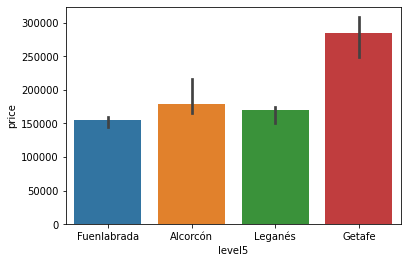

In [3]:
from statistics import median
sbelt = df[(df['level5'] == "Fuenlabrada") | (df['level5'] == "Leganés") | (df['level5'] == "Getafe") | (df['level5'] == "Alcorcón")]
sb.barplot(x = sbelt['level5'], y = sbelt['price'], estimator = median)
plt.show()

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

In [24]:
variables = sbelt[['price', 'rooms', 'surface', 'bathrooms']]
print(variables.mean()) 
print(variables.var())

price        223094.480706
rooms             3.017738
surface         111.752224
bathrooms         1.633222
dtype: float64
price        1.492137e+10
rooms        7.188859e-01
surface      4.263052e+03
bathrooms    5.717969e-01
dtype: float64


#### What is the most expensive home of each population? (★★☆) 

In [5]:
sbelt.groupby('level5')['price'].agg('max')

level5
Alcorcón        950000
Fuenlabrada     490000
Getafe         1050000
Leganés         650000
Name: price, dtype: int64

#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

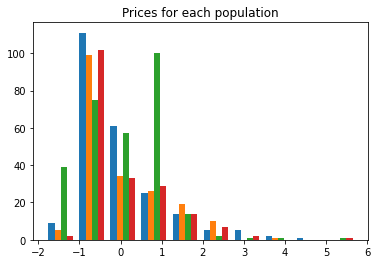

In [30]:
sbelt_fuen = sbelt[(sbelt['level5'] == "Fuenlabrada")]
sbelt_leg = sbelt[(sbelt['level5'] == "Leganés")]
sbelt_ge = sbelt[(sbelt['level5'] == "Getafe")]
sbelt_alc = sbelt[(sbelt['level5'] == "Alcorcón")] 

nfuen=(sbelt_fuen['price']-np.nanmean(sbelt_fuen['price']))/np.nanstd(sbelt_fuen['price'])
nleg=(sbelt_leg['price']-np.nanmean(sbelt_leg['price']))/np.nanstd(sbelt_leg['price'])
nge=(sbelt_ge['price']-np.nanmean(sbelt_ge['price']))/np.nanstd(sbelt_ge['price'])
nalc=(sbelt_alc['price']-np.nanmean(sbelt_alc['price']))/np.nanstd(sbelt_alc['price'])

plt.hist([nfuen, nleg, nge, nalc])
plt.title("Prices for each population")
plt.show()

#Couldn't figure out how to add color labels

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [8]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet

from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [10]:
from ipyleaflet import Map, GeoJSON, GeoData
import geopandas

zone = sbelt['level5'].unique().tolist()
colors = np.array(['#458B74','#E3CF57','#FF9912','#BF3EFF'])

dt = sbelt.copy()

dt['latitude'] = dt['latitude'].str.replace(',' , '.').astype(float)
dt['longitude'] = dt['longitude'].str.replace(',' , '.').astype(float)

for i, x in enumerate(zone):
    z=dt.loc[dt['level5']==x]

    gdf = geopandas.GeoDataFrame(z, geometry=geopandas.points_from_xy(z.longitude, z.latitude))
    
    geo_data = GeoData(geo_dataframe = gdf,
        style={'color': 'black', 'radius':8, 'fillColor': colors[i], 'opacity':0.5, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
        hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
        point_style={'radius': 5, 'color': 'red', 'fillOpacity': 0.8, 'fillColor': 'blue', 'weight': 3},
        name = 'Release')
    map.add_layer(geo_data)
map

Map(bottom=198059.0, center=[40.32822537016228, -3.631668090820313], controls=(ZoomControl(options=['position'…

#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

In [43]:
print(np.sum(sbelt_ge['price'])/np.sum(sbelt_ge['surface'])) #Getafe
print(np.sum(sbelt_alc['price'])/np.sum(sbelt_alc['surface'])) #Alcorcón
#El precio por m2 es más alto en Getafe


2513.3001438754823
2385.717404355182


#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

In [44]:
valdeygala = df[(df['level5'] == "Valdemorillo") | (df['level5'] == "Galapagar")]
valdeygala.groupby('level5')['price'].mean()
#Average of prices is not the same, it's similar though.

level5
Galapagar       360063.202381
Valdemorillo    363860.293103
Name: price, dtype: float64

#### What happens if we do the same analysis for price/m2 (★★☆) 

In [4]:
df['pricem2'] = df['price'] / df['surface']
valdeygala = df[(df['level5'] == "Valdemorillo") | (df['level5'] == "Galapagar")]
valdeygala.groupby('level5')['pricem2'].mean()
#Average is not the same. Actually, the difference is bigger.

level5
Galapagar       1606.324030
Valdemorillo    1317.950211
Name: pricem2, dtype: float64

#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

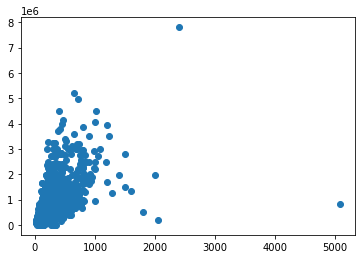

In [9]:
x = df['surface'][:4000]
y = df['price'][:4000]

plt.scatter(x, y)
plt.show()

#La relación parecería ser positiva


#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

Text(0.5, 1.0, 'Alcorcón')

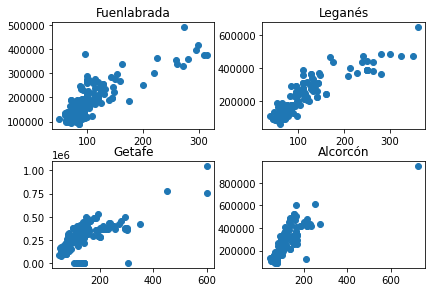

In [22]:
sbelt_fuen = sbelt[(sbelt['level5'] == "Fuenlabrada")]
sbelt_leg = sbelt[(sbelt['level5'] == "Leganés")]
sbelt_ge = sbelt[(sbelt['level5'] == "Getafe")]
sbelt_alc = sbelt[(sbelt['level5'] == "Alcorcón")] 

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.tight_layout()
s1 = sbelt_fuen['surface']
p1 = sbelt_fuen['price']
s2 = sbelt_leg['surface']
p2 = sbelt_leg['price']
s3 = sbelt_ge['surface']
p3 = sbelt_ge['price']
s4 = sbelt_alc['surface']
p4 = sbelt_alc['price']

ax1.scatter(s1, p1)
ax2.scatter(s2, p2)
ax3.scatter(s3, p3)
ax4.scatter(s4, p4)

ax1.set_title('Fuenlabrada')
ax2.set_title('Leganés')
ax3.set_title('Getafe')
ax4.set_title('Alcorcón')

#### How many  real estate agencies the dataset contains? (★★☆) 

In [20]:
realestategroup = df.groupby(['id_realEstates'])
print(len(realestategroup))

14217


#### What is the population (level 5) that contains the most houses? (★★☆) 

In [27]:
dfbypopulation = df.groupby(['level5'])
dfbypopulation.count() #La mayoría de las casas están en Madrid Capital

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
level5,,,,,,,,,,,,,,,,,,,,,
Madrid Capital,6643,6643,6643,6639,6269,6643,6472,6492,6237,6643,...,6643,6643,6643,6643,6643,6643,6643,6643,0,0
Ajalvir,17,17,17,17,16,17,17,17,16,17,...,17,17,17,17,17,17,17,17,0,0
Alcalá de Henares,525,525,525,525,514,525,514,517,499,525,...,525,525,525,525,525,525,525,525,0,0
Alcobendas,259,259,259,259,256,259,250,254,256,259,...,259,259,259,259,259,259,259,259,0,0
Alcorcón,190,190,190,190,174,190,188,186,173,190,...,190,190,190,190,190,190,190,190,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villar del Olmo,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,0,0
Villarejo de Salvanés,19,19,19,19,19,19,16,16,17,19,...,19,19,19,19,19,19,19,19,0,0
Villaviciosa de Odón,166,166,166,166,163,166,165,166,148,166,...,166,166,166,166,166,166,166,166,0,0
